# ML - Aprendizaje No Supervisado

## Clustering

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [30]:
from sklearn.datasets import make_blobs
import numpy as np

# creamos un dataset sintetico para un testeo de Aprendizaje No Supervisado con K-means y Clustering
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, random_state=20)


In [31]:
import matplotlib.pyplot as plt # Graficamos los datos para una mejor comprension 

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

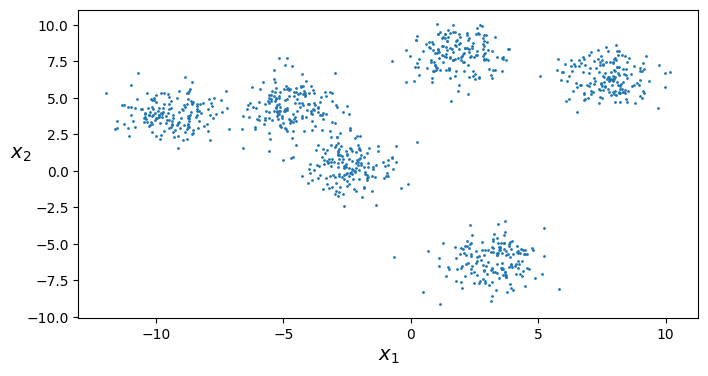

In [32]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [46]:
from sklearn.cluster import KMeans

k = 6 # Definimos el numero de clusters
kmeans = KMeans(n_clusters=k, random_state=42) # Instanciamos el modelo
y_pred = kmeans.fit_predict(X) # Ajustamos el modelo y predecimos los clusters
y_pred

array([3, 1, 4, 2, 0, 0, 2, 1, 4, 4, 4, 3, 0, 4, 5, 2, 0, 0, 2, 1, 5, 1,
       5, 5, 4, 5, 5, 5, 2, 2, 2, 3, 2, 0, 3, 0, 1, 1, 1, 2, 3, 5, 5, 3,
       0, 1, 4, 2, 5, 5, 1, 4, 1, 1, 5, 4, 3, 0, 2, 4, 2, 0, 2, 0, 0, 0,
       5, 5, 0, 4, 3, 2, 4, 1, 5, 4, 4, 2, 3, 1, 4, 2, 5, 0, 1, 4, 2, 5,
       3, 1, 1, 2, 2, 3, 4, 3, 4, 1, 1, 5, 3, 2, 0, 5, 2, 0, 4, 1, 3, 2,
       2, 3, 5, 1, 3, 3, 4, 4, 0, 5, 0, 2, 1, 5, 5, 4, 0, 4, 1, 1, 1, 2,
       5, 3, 1, 2, 3, 4, 3, 1, 5, 2, 3, 5, 3, 0, 1, 2, 3, 2, 5, 3, 2, 2,
       2, 1, 5, 1, 1, 0, 0, 4, 0, 2, 0, 4, 0, 5, 3, 3, 2, 3, 4, 1, 2, 1,
       3, 5, 1, 3, 3, 1, 4, 2, 2, 2, 3, 4, 5, 4, 5, 3, 1, 3, 0, 3, 4, 1,
       2, 5, 1, 4, 1, 4, 1, 4, 2, 5, 3, 0, 0, 4, 4, 1, 3, 1, 2, 1, 0, 5,
       4, 4, 0, 4, 5, 3, 0, 3, 5, 0, 1, 5, 3, 2, 3, 3, 0, 5, 2, 2, 5, 4,
       3, 5, 5, 5, 0, 0, 1, 0, 4, 0, 3, 1, 2, 1, 4, 4, 1, 2, 3, 0, 5, 0,
       0, 2, 5, 0, 5, 2, 4, 2, 3, 3, 4, 5, 1, 4, 4, 4, 2, 3, 1, 5, 4, 4,
       5, 5, 2, 3, 2, 1, 1, 5, 0, 2, 5, 5, 5, 4, 3,

In [47]:
kmeans.cluster_centers_ # Obtenemos los centroides de los clusters

array([[ 7.72045226,  6.39005856],
       [-9.39289261,  3.88719389],
       [ 3.20930159, -6.17877858],
       [-4.71508544,  4.4271291 ],
       [ 1.81103094,  8.00012879],
       [-2.45142171,  0.36789973]])

In [48]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) # Creamos nuevos datos para predecir a que cluster pertenecen
kmeans.predict(X_new)

array([5, 5, 3, 5])

In [49]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2) # Graficamos los datos

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1) # Graficamos los centroides

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # Graficamos los limites de decision

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False) # Graficamos los datos y los limites de decision

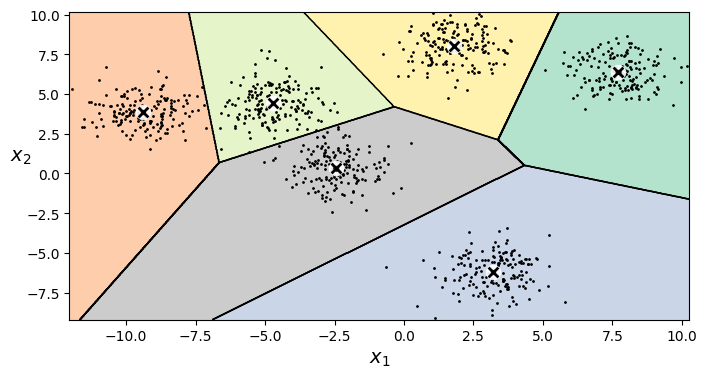

In [50]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show() # Graficamos los limites de decision

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [54]:
kmeans.transform(X_new) # Obtenemos la distancia de cada instancia a cada centroide

array([[ 8.88132858,  9.58060188,  8.78589983,  5.30311101,  6.26748583,
         2.94503305],
       [ 6.44633878, 12.53576037,  8.18145624,  8.08786122,  6.11679597,
         5.69049646],
       [11.24369129,  6.45416059, 11.0817599 ,  2.23119151,  6.93882603,
         2.68865951],
       [11.40441372,  6.54166514, 10.67129907,  2.57979546,  7.30735488,
         2.20154257]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [55]:
kmeans_iter1 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="elkan", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X) # Ajustamos el modelo con diferentes iteraciones

KMeans(algorithm='elkan', init='random', max_iter=3, n_clusters=6, n_init=1,
       random_state=1)

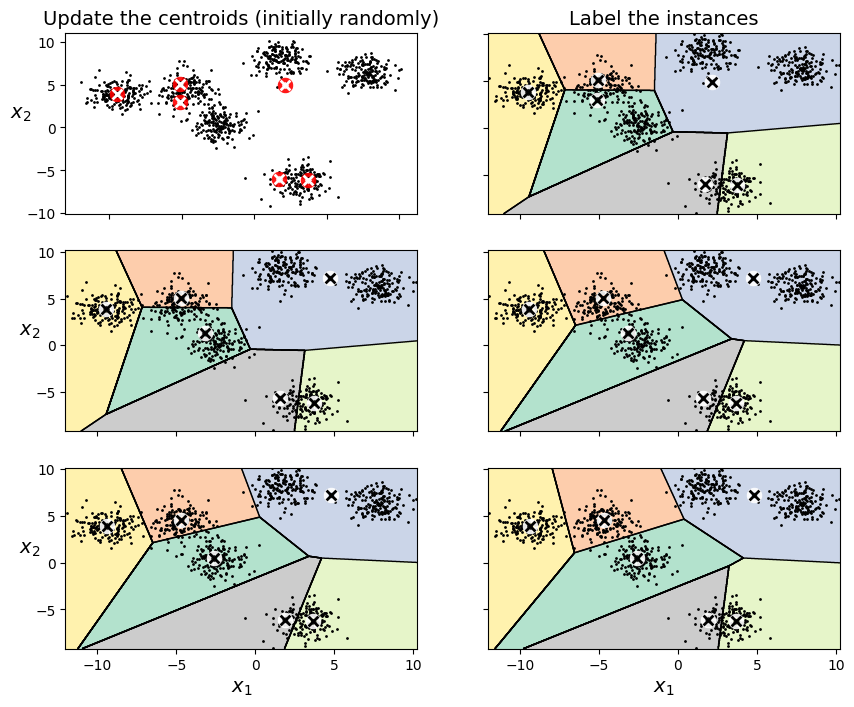

In [56]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show() # Graficamos los limites de decision en cada iteracion

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [58]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14) # Comparamos dos modelos de clustering

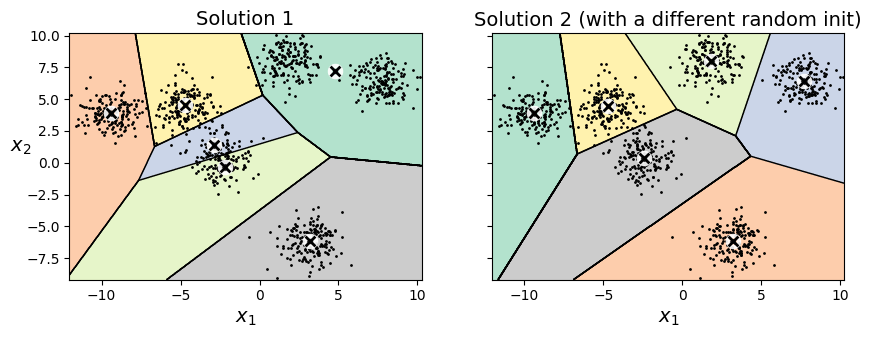

In [60]:
kmeans_rnd_init1 = KMeans(n_clusters=6, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=6, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show() # Graficamos la comparacion de dos modelos de clustering

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [63]:
kmeans_rnd_10_inits = KMeans(n_clusters=6, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X) # Ajustamos el modelo con 10 inicializaciones aleatorias

KMeans(algorithm='elkan', init='random', n_clusters=6, n_init=10,
       random_state=11)

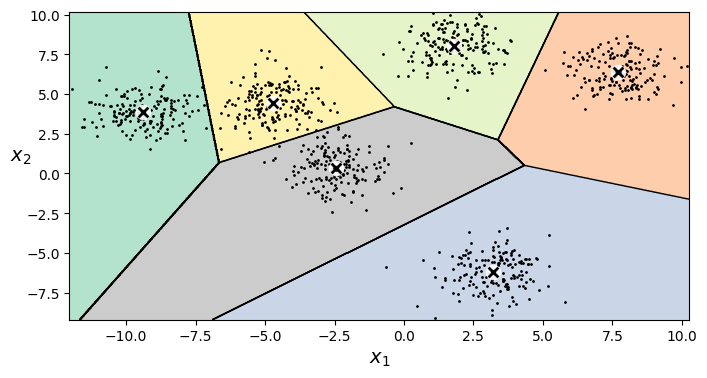

In [64]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset Glyphs_TMNIST

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv('Glyphs_TMNIST_updated.csv') # Cargamos el dataset
data_aux = data.sample(frac=0.1, random_state=24)

data_aux = data_aux.iloc[:, 3:].values

from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(data_aux, test_size=0.2, random_state=42) # Dividimos el dataset en entrenamiento y test

In [88]:
del data
del data_aux
# Eliminamos las variables que no necesitamos para liberar memoria
X_train.shape

(45223, 784)

In [89]:
def load_next_batch(batch_size):
    return X_train[np.random.choice(len(X_train), batch_size, replace=False)] # Creamos una funcion para cargar los datos en lotes

In [90]:
from sklearn.cluster import MiniBatchKMeans

k = 50
n_init = 10
n_iterations = 100
batch_size = 1500
init_size = 1000
evaluate_on_last_n_iters = 10

best_kmeans = None # Definimos los parametros para el modelo de clustering

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) # Instanciamos el modelo
    X_init = load_next_batch(init_size) # Cargamos los datos en lotes 
    minibatch_kmeans.partial_fit(X_init) # Ajustamos el modelo

    minibatch_kmeans.sum_inertia_ = 0 # Calculamos la inercia del modelo
    for iteration in range(n_iterations): # Ajustamos el modelo en cada iteracion
        X_batch = load_next_batch(batch_size) # Cargamos los datos en lotes
        minibatch_kmeans.partial_fit(X_batch) # Ajustamos el modelo
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_ # Calculamos la inercia del modelo

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans # Ajustamos el modelo de clustering

In [91]:
best_kmeans.score(X_train) # Obtenemos el score del modelo

-86405757690.64072

In [92]:
kmeans = KMeans(n_clusters=50, random_state=42)
y_pred = kmeans.fit_predict(X_train)
from sklearn.metrics import silhouette_score
silhouette_score(X_train, kmeans.labels_) # Obtenemos el score de silueta del modelo

0.04358947980342197

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

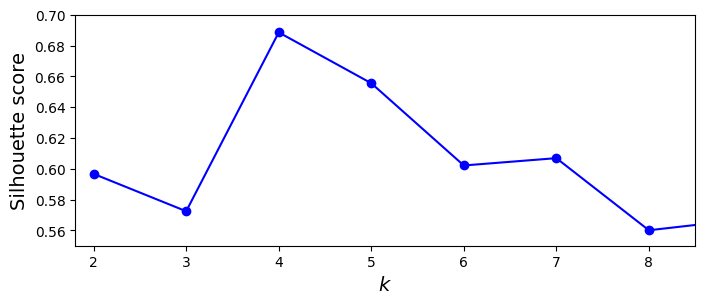

In [65]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(45, 50)]

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 50, 0.55, 0.7])
plt.show() # Graficamos el score de silueta para diferentes valores de k

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

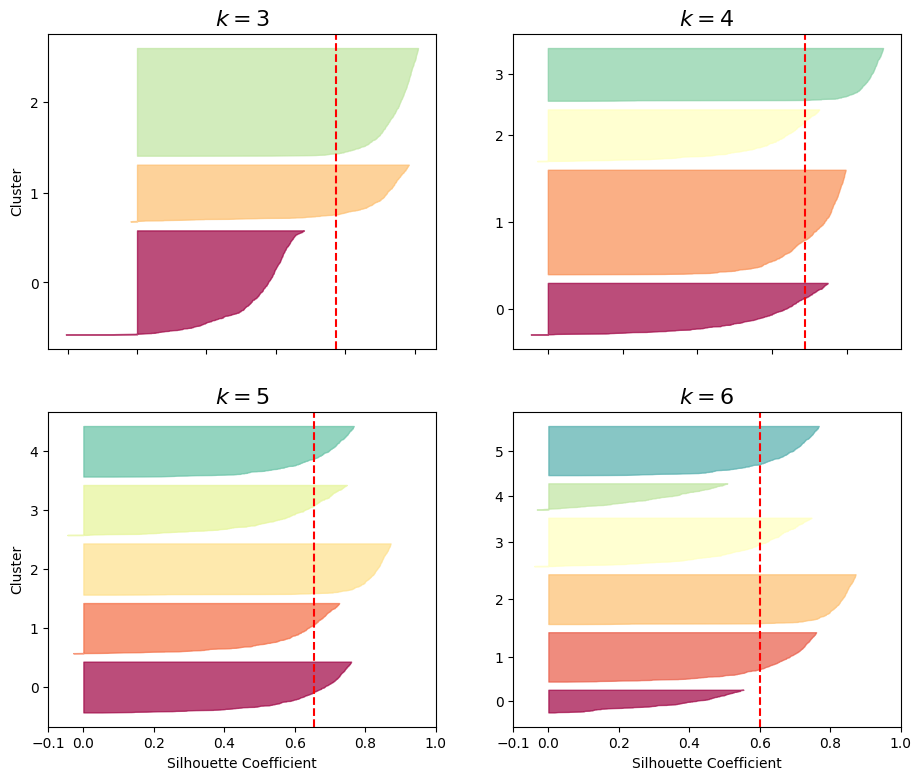

In [66]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9)) # Graficamos el score de silueta para diferentes valores de k

for k in (47,48,49,50):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()